# LOGISTIC REGRESSION

## CONTENTS

__1. INTRODUCTION__
      
      
__2. LIBRARIES AND DATA__


__3. PREPROCESSING__
            
            
__4. LOGISTIC REGRESSION__


__5. RESULTS__


## 1. INTRODUCTION

In this Jupyter Notebook, we'll employ Logistic Regression.

To assess model performance, we'll compute the metrics accuracy and recall in three different versions : 1) calculated from the training data, 2) cross validated version and 3) calculated from the test data

## 2. LIBRARIES AND DATA

__Libraries__

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.exceptions import FitFailedWarning

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=FitFailedWarning)
warnings.filterwarnings('ignore', category=UserWarning)

__Importing data__

In [2]:
data1 = pd.read_csv("train_dataset.csv") 
data2 = pd.read_csv("test_dataset.csv") 

# Train and test Dataset
train_df = data1.copy()
test_df = data2.copy()

In [3]:
train_df.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,AHD
0,60,1,130,253,0,0,144,1,1.4,1,1,1,0,0,0,0,1
1,65,0,155,269,0,0,148,0,0.8,1,0,0,0,0,0,1,0


In [4]:
test_df.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,AHD
0,66,1,112,212,0,2,132,1,0.1,1,1,1,0,0,0,1,1
1,64,1,128,263,0,0,105,1,0.2,2,1,1,0,0,0,0,0


## 3. LIBRARIES AND DATA

In [5]:
# Defining kfold validation
cv = KFold(n_splits=5) 

In [6]:
# Defining X_train, Y_train, X_test, Y_test
X_train = train_df.drop(columns = 'AHD')
Y_train = train_df['AHD']

X_test = test_df.drop(columns = 'AHD')
Y_test = test_df['AHD']

# Creating lists with the columns names
cols = X_train.columns

# Scaling the Xs
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

# Creating Dataframes
X_train = pd.DataFrame(X_train_sc, columns=cols)
X_test = pd.DataFrame(X_test_sc, columns=cols)

In [7]:
# Displaying X_train df
X_train.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal
0,0.647200,0.688468,-0.096276,0.108440,-0.450367,-1.044172,-0.247911,1.452500,0.348432,-0.974559,0.323044,1.094658,-0.450367,-0.307279,-0.267261,-1.129949
1,1.219447,-1.452500,1.341100,0.439355,-0.450367,-1.044172,-0.075304,-0.688468,-0.192238,-0.974559,-0.719693,-0.913527,-0.450367,-0.307279,-0.267261,0.884995


In [8]:
# Displaying X_test df
X_test.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal
0,1.091325,0.637377,-1.050215,-0.512118,-0.215666,1.346291,-0.844271,1.346291,-0.861072,-0.958706,0.743873,0.85485,-0.429198,-0.150756,-0.150756,0.894427
1,0.901345,0.637377,-0.181071,0.571118,-0.215666,-0.742781,-2.142737,1.346291,-0.760948,0.766965,0.743873,0.85485,-0.429198,-0.150756,-0.150756,-1.118034


## 4. LOGISTIC REGRESSION

In [9]:
# Defining Grid for GridSearchCV
grid = {'penalty': ['l1', 'l2','elasticnet'],
              'C': [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'tol': [1e-3, 1e-4, 1e-5]} 

In [10]:
# Instantiating GridSearchCV 

LogReg_search = GridSearchCV(LogisticRegression(max_iter = 10000, random_state = 126), 
                            grid, scoring='recall', cv=cv, n_jobs=-1) 

In [11]:
# Searching for the best parameters 

CV_LogReg_results = LogReg_search.fit(X_train, Y_train)

In [12]:
# Displaying the best parameters 

LogReg_Best_Parameters = pd.DataFrame(CV_LogReg_results.best_params_,
                                       index = ['Best Parameters'])

LogReg_Best_Parameters = LogReg_Best_Parameters.transpose()
LogReg_Best_Parameters

,Best Parameters
C,0.1
penalty,l1
solver,liblinear
tol,0.001


In [13]:
# Storing the values of the best parameters

best_C = CV_LogReg_results.best_params_['C']
best_penalty = CV_LogReg_results.best_params_['penalty']
best_solver = CV_LogReg_results.best_params_['solver']
best_tol = CV_LogReg_results.best_params_['tol']

In [14]:
# Instantiating the best model

LogRegModel = LogisticRegression(max_iter = 10000, 
                                 random_state = 126,
                                 C = best_C,
                                penalty = best_penalty,
                                solver=best_solver,
                                tol= best_tol).fit(X_train,Y_train)

In [15]:
# Getting training metrics

training_predictions = LogRegModel.predict(X_train)

LogReg_training_accuracy = np.round(accuracy_score(Y_train, training_predictions),3)
LogReg_training_recall = np.round(recall_score(Y_train, training_predictions),3)


In [16]:
# Getting kfold metrics 

logreg_cv_accuracy = round(np.mean(cross_val_score(LogRegModel, X_train, Y_train, cv=cv, 
                                          scoring='accuracy', error_score='raise')),3)


logreg_cv_recall = round(np.mean(cross_val_score(LogRegModel, X_train, Y_train, cv=cv, 
                                          scoring='recall', error_score='raise')),3)

In [17]:
# Getting test metrics

test_predictions = LogRegModel.predict(X_test)
LogReg_test_accuracy = np.round(accuracy_score(Y_test, test_predictions),3)
LogReg_test_recall = np.round(recall_score(Y_test, test_predictions),3)

In [18]:
# Dictionary that holds the performance metrics 

dict1 = {'Logistic Regression': (LogReg_training_accuracy, LogReg_training_recall, 
                                 logreg_cv_accuracy, logreg_cv_recall,
                                LogReg_test_accuracy, LogReg_test_recall)}

In [19]:
# Creating a dataframe to easily present the results 

Evaluation_df = pd.DataFrame(dict1, index=['Training Accuracy','Training Recall',
                                           'CV Accuracy','CV Recall', 
                                           'Test Accuracy','Test Recall'])

## 5. Results

__Aggragated Results__

In [20]:
# Displaying the metrics

Evaluation_df

,Logistic Regression
Training Accuracy,0.871
Training Recall,0.833
CV Accuracy,0.859
CV Recall,0.830
Test Accuracy,0.756
Test Recall,0.696


__Confusion Matrices__

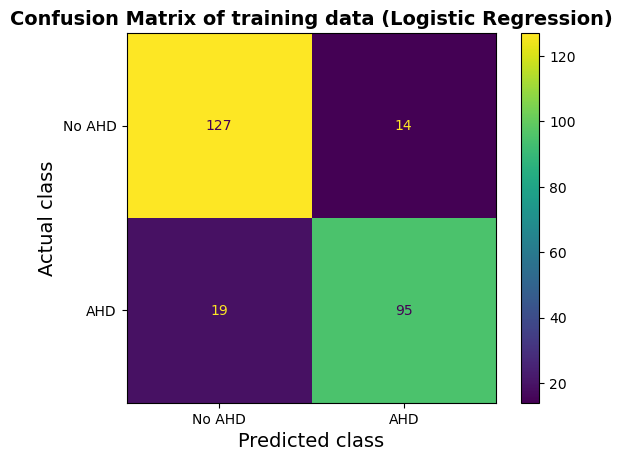

In [21]:
cm = confusion_matrix(Y_train, training_predictions, labels=LogRegModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LogRegModel.classes_)
disp.plot()
plt.title("Confusion Matrix of training data (Logistic Regression)", fontsize = 14, weight = 'bold')
plt.xlabel("Predicted class", fontsize = 14)
plt.ylabel("Actual class", fontsize = 14)

plt.xticks(ticks = [0,1], labels=['No AHD', 'AHD'])
plt.yticks(ticks = [0,1], labels=['No AHD', 'AHD'])
# plt.savefig('CM_tr_LR')
plt.show()

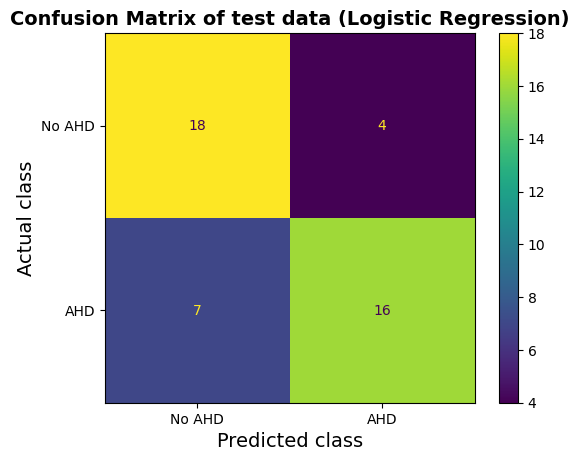

In [22]:
cm = confusion_matrix(Y_test, test_predictions, labels=LogRegModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LogRegModel.classes_)
disp.plot()
plt.title("Confusion Matrix of test data (Logistic Regression)", fontsize = 14, weight = 'bold')
plt.xlabel("Predicted class", fontsize = 14)
plt.ylabel("Actual class", fontsize = 14)

plt.xticks(ticks = [0,1], labels=['No AHD', 'AHD'])
plt.yticks(ticks = [0,1], labels=['No AHD', 'AHD'])
plt.savefig('CM_te_LR')
plt.show()

__Saving the Results__

In [23]:
Evaluation_df.to_csv(r'LogisticRegression_Results.csv', index=True, 
                                              index_label= 'Metrics')